# 🎯 **Projet STA211 - Classification des Publicités**

## Introduction

Ce projet s'inscrit dans le cadre du cours STA211 et vise à développer un modèle de classification pour prédire si une image est une publicité ou non, en utilisant le dataset Internet Advertisements.

### 📊 Contexte et Enjeux
- **Problématique** : Classification binaire d'images (publicité vs. non-publicité)
- **Dataset** : Internet Advertisements Dataset
- **Dimensions** : 2459 observations × 1559 variables

### 🎯 Objectifs
1. Analyser et comprendre la structure des données
2. Développer des modèles de classification performants
3. Évaluer et comparer différentes approches
4. Interpréter les résultats et identifier les facteurs clés

### 🔍 Méthodologie
Notre approche suivra une démarche scientifique rigoureuse :
1. Analyse exploratoire approfondie
2. Prétraitement et feature engineering
3. Modélisation avec différentes approches
4. Validation croisée et optimisation
5. Interprétation et conclusions

Ce premier notebook se concentre sur **l'analyse exploratoire et le prétraitement des données** pour le projet STA211 de prédiction de publicités.

## Table des Matières
1. [Chargement et Aperçu des Données](#chargement)
2. [Gestion des Valeurs Manquantes](#valeurs-manquantes)
   * [Analyse des mecanismes (MAR, MNAR, MCAR)](#mecanisme-valeurs-manquantes)
   * [Imputation simple (par la médiane)](#imputation-mediane)
   * [Imputation KNN](#imputation-knn)
   * [Imputation multiple](#imputation-multiple)
3. [Analyse Exploratoire](#analyse-exploratoire)
   * [Analyse Univariée](#analyse-univariee)
   * [Analyse Bivariée](#analyse-bivariee)
   * [Analyse Multivariée](#analyse-multivariee)
4. [Selection automatiques des variables pertinentes](#selection-variables)
5. [Réduction de Dimensionnalité - AFM](#reduction-dim)
6. [Prétraitement Final (transformation des variables)](#pretraitement)
7. [Export des Données](#export-des-donnees)



In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
#pip install -r "/content/drive/Othercomputers/Mon_pc_hp/Documents/Projects/STA211_Challenge_2025/requirements.txt"

# Préparation de l'environnement

In [ ]:
import sys
import os

def is_colab():
    """Retourne True si on est dans Google Colab."""
    try:
        import google.colab  # noqa
        return True
    except ImportError:
        return False

# 1) Détecter l'environnement et monter le Drive si besoin
if is_colab():
    from google.colab import drive  # noqa
    drive.mount('/content/drive', force_remount=True)
    ROOT_DIR = "/content/drive/Othercomputers/Mon_pc_hp/Documents/Projects/STA211_Challenge_2025"
else:
    # Chemin racine de ton projet en local Windows
    ROOT_DIR = r"C:\Users\aella\OneDrive\Documents\Projects\STA211_Challenge_2025"

# 2) Construire les dossiers « modules » et « data/raw »
MODULE_DIR   = os.path.join(ROOT_DIR, "modules")
RAW_DATA_DIR = os.path.join(ROOT_DIR, "data", "raw")
DATA_PROCESSED =os.path.join(ROOT_DIR, "data", "processed")
MODELS_DIR   = os.path.join(ROOT_DIR, "models")

FIGURES_DIR = os.path.join(ROOT_DIR, "outputs", "figures")
os.makedirs(FIGURES_DIR, exist_ok=True)
os.makedirs(DATA_PROCESSED, exist_ok=True)  # Création si le dossier n'existe pas

# Définir la variable d'environnement
#os.environ['FIGURES_DIR'] = FIGURES_DIR


# 3) Ajouter MODULE_DIR dans sys.path
if MODULE_DIR not in sys.path:
    sys.path.insert(0, MODULE_DIR)

# Debug
print("ROOT_DIR      =", ROOT_DIR)
print("MODULE_DIR    =", MODULE_DIR)
print("RAW_DATA_DIR  =", RAW_DATA_DIR)
print("DATA_PROCESSED =", DATA_PROCESSED)
print("FIGURES_DIR   =", FIGURES_DIR)


# 4) Importer tes modules
from data_preprocessing import *
from exploratory_analysis import *


ROOT_DIR      = C:\Users\aella\OneDrive\Documents\Projects\STA211_Challenge_2025
MODULE_DIR    = C:\Users\aella\OneDrive\Documents\Projects\STA211_Challenge_2025\modules
RAW_DATA_DIR  = C:\Users\aella\OneDrive\Documents\Projects\STA211_Challenge_2025\data\raw
DATA_PROCESSED = C:\Users\aella\OneDrive\Documents\Projects\STA211_Challenge_2025\data\processed
FIGURES_DIR   = C:\Users\aella\OneDrive\Documents\Projects\STA211_Challenge_2025\outputs\figures


In [ ]:
# Import des bibliothéques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer, KNNImputer
import prince  # Pour l'analyse factorielle multiple
import missingno as msno #spécialisée pour visualiser les valeurs manquantes
import umap
import warnings

# Configuration des visualisations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)


# 1. Chargement et Aperçu des Données <a id="chargement"></a>

In [ ]:
# Charger le dataset d'entraînement
train_path = os.path.join(RAW_DATA_DIR, "data_train.csv")
data = load_data(train_path)

Dimensions du dataset: (2459, 1559)

Infos colonnes :
<class 'pandas.core.frame.DataFrame'>
Index: 2459 entries, 1 to 2459
Columns: 1559 entries, X1 to outcome
dtypes: float64(4), int64(1554), object(1)
memory usage: 29.3+ MB

Aperçu des données :


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X72,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X121,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X188,X189,X190,X191,X192,X193,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,X228,X229,X230,X231,X232,X233,X234,X235,X236,X237,X238,X239,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256,X257,X258,X259,X260,X261,X262,X263,X264,X265,X266,X267,X268,X269,X270,X271,X272,X273,X274,X275,X276,X277,X278,X279,X280,X281,X282,X283,X284,X285,X286,X287,X288,X289,X290,X291,X292,X293,X294,X295,X296,X297,X298,X299,X300,X301,X302,X303,X304,X305,X306,X307,X308,X309,X310,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320,X321,X322,X323,X324,X325,X326,X327,X328,X329,X330,X331,X332,X333,X334,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X381,X382,X383,X384,X385,X386,X387,X388,X389,X390,X391,X392,X393,X394,X395,X396,X397,X398,X399,X400,X401,X402,X403,X404,X405,X406,X407,X408,X409,X410,X411,X412,X413,X414,X415,X416,X417,X418,X419,X420,X421,X422,X423,X424,X425,X426,X427,X428,X429,X430,X431,X432,X433,X434,X435,X436,X437,X438,X439,X440,X441,X442,X443,X444,X445,X446,X447,X448,X449,X450,X451,X452,X453,X454,X455,X456,X457,X458,X459,X460,X461,X462,X463,X464,X465,X466,X467,X468,X469,X470,X471,X472,X473,X474,X475,X476,X477,X478,X479,X480,X481,X482,X483,X484,X485,X486,X487,X488,X489,X490,X491,X492,X493,X494,X495,X496,X497,X498,X499,X500,X501,X502,X503,X504,X505,X506,X507,X508,X509,X510,X511,X512,X513,X514,X515,X516,X517,X518,X519,X520,X521,X522,X523,X524,X525,X526,X527,X528,X529,X530,X531,X532,X533,X534,X535,X536,X537,X538,X539,X540,X541,X542,X543,X544,X545,X546,X547,X548,X549,X550,X551,X552,X553,X554,X555,X556,X557,X558,X559,X560,X561,X562,X563,X564,X565,X566,X567,X568,X569,X570,X571,X572,X573,X574,X575,X576,X577,X578,X579,X580,X581,X582,X583,X584,X585,X586,X587,X588,X589,X590,X591,X592,X593,X594,X595,X596,X597,X598,X599,X600,X601,X602,X603,X604,X605,X606,X607,X608,X609,X610,X611,X612,X613,X614,X615,X616,X617,X618,X619,X620,X621,X622,X623,X624,X625,X626,X627,X628,X629,X630,X631,X632,X633,X634,X635,X636,X637,X638,X639,X640,X641,X642,X643,X644,X645,X646,X647,X648,X649,X650,X651,X652,X653,X654,X655,X656,X657,X658,X659,X660,X661,X662,X663,X664,X665,X666,X667,X668,X669,X670,X671,X672,X673,X674,X675,X676,X677,X678,X679,X680,X681,X682,X683,X684,X685,X686,X687,X688,X689,X690,X691,X692,X693,X694,X695,X696,X697,X698,X699,X700,X701,X702,X703,X704,X705,X706,X707,X708,X709,X710,X711,X712,X713,X714,X715,X716,X717,X718,X719,X720,X721,X722,X723,X724,X725,X726,X727,X728,X729,X730,X731,X732,X733,X734,X735,X736,X737,X738,X739,X740,X741,X742,X743,X744,X745,X746,X747,X748,X749,X750,X751,X752,X753,X754,X755,X756,X757,X758,X759,X760,X761,X762,X763,X764,X765,X766,X767,X768,X769,X770,X771,X772,X773,X774,X775,X776,X777,X778,X779,X780,X781,X782,X783,X784,X785,X786,X787,X788,X789,X790,X791,X792,X793,X794,X795,X796,X797,X798,X799,X800,X801,X802,X803,X804,X805,X806,X807,X808,X809,X810,X811,X812,X813,X814,X815,X816,X817,X818,X819,X820,X821,X8

In [ ]:
data['X4'].unique()

array([ 1.,  0., nan])

In [ ]:


# Copie pour préserver df original
df = data.copy()

# Mémoire avant conversion
mem_before = df.memory_usage(deep=True).sum()

non_binary_cols = []

for col in df.columns:
    if col == 'outcome':
        continue  # 🔒 On ne modifie pas la variable cible

    unique_values = set(df[col].dropna().unique())

    if unique_values.issubset({0, 1}) and df[col].isna().sum() == 0:
        df[col] = df[col].astype('uint8')

    elif df[col].dtype == 'int64' and df[col].isna().sum() == 0:
        if df[col].min() >= 0 and df[col].max() <= 255:
            df[col] = df[col].astype('uint8')
        else:
            non_binary_cols.append(col)

    elif col == 'X4':
        if df[col].dropna().min() >= 0 and df[col].dropna().max() <= 255:
            df[col] = df[col].astype('UInt8')
        else:
            non_binary_cols.append(col)

    else:
        non_binary_cols.append(col)

# Mémoire après conversion
mem_after = df.memory_usage(deep=True).sum()

# Affichage en Mo
print(f"📊 Mémoire avant conversion : {mem_before / (1024**2):.2f} Mo")
print(f"📉 Mémoire après conversion : {mem_after / (1024**2):.2f} Mo")
print(f"💾 Gain mémoire total       : {(mem_before - mem_after) / (1024**2):.2f} Mo")


📊 Mémoire avant conversion : 29.37 Mo
📉 Mémoire après conversion : 3.85 Mo
💾 Gain mémoire total       : 25.52 Mo


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2459 entries, 1 to 2459
Columns: 1559 entries, X1 to outcome
dtypes: UInt8(1), float64(3), object(1), uint8(1554)
memory usage: 3.7+ MB


In [ ]:
na_percent = df.isna().mean() * 100  # en pourcentage
na_percent = na_percent[na_percent > 0].sort_values(ascending=False)

print(na_percent)



X3    27.612851
X1    27.409516
X2    27.368849
X4     0.447336
dtype: float64


# 2. Gestion des Valeurs Manquantes <a id="valeurs-manquantes"></a>
## 2.1 Analyse des mécanismes (MAR, MCAR, MNAR) <a id="mecanisme-valeurs-manquantes">


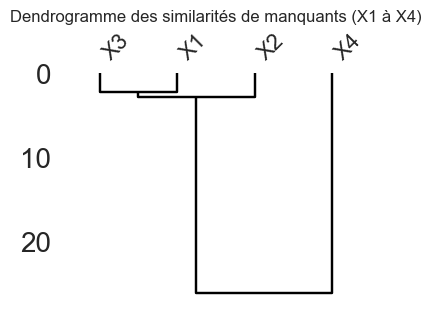

In [ ]:
#from exploratory_analysis import save_fig


# On ne garde que les colonnes qui ont des manquants
cols_missing = ['X1', 'X2', 'X3', 'X4']

# Échantillonnez un peu de lignes si vous voulez, mais avec 4 colonnes ce n'est déjà plus nécessaire :
df_sub = df[cols_missing]  # .sample(n=500, random_state=42) si vous le souhaitez

# Dendrogramme sur ces 4 colonnes seulement
msno.dendrogram(df_sub)
plt.title("Dendrogramme des similarités de manquants (X1 à X4)")
save_fig("dendrogram_missing_X1_X4.png", directory=FIGURES_DIR, figsize=(4, 3))
plt.close()



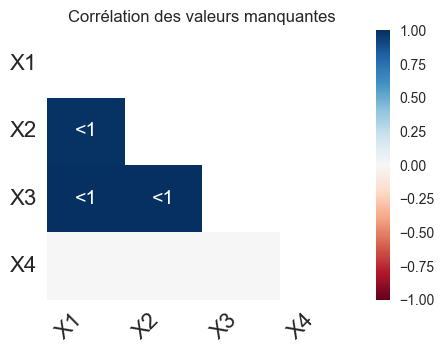

In [ ]:
# Heatmap
msno.heatmap(df_sub, figsize=(6,4))
plt.title("Corrélation des valeurs manquantes")
save_fig("missingno_heatmap.png")

### Heatmap des corrélations de présence

La heatmap ci-dessus montre les corrélations entre les patterns de présence/absence des données :

- Les variables `X1`, `X2` et `X3` présentent des corrélations proches de **1**, ce qui indique qu'elles ont tendance à manquer **simultanément**.
- `X4` n'est pas corrélée avec les 3 autres.


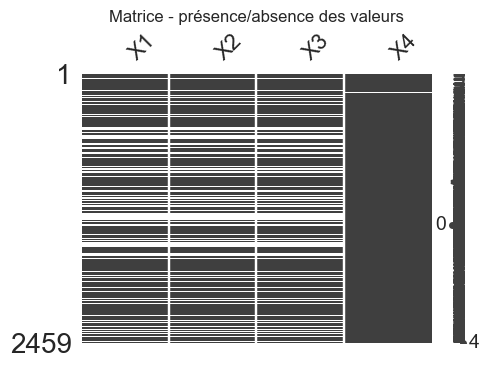

In [ ]:
# Matrix
msno.matrix(df_sub, figsize=(6,3))
plt.title("Matrice - présence/absence des valeurs")
save_fig("missingno_matrix.png")


### Matrice de valeurs manquantes

Chaque ligne représente un individu, chaque colonne une variable.  
Les bandes blanches indiquent des valeurs manquantes.  
On observe que `X1`, `X2` et `X3` ont souvent des valeurs manquantes **en même temps**.  

---

In [ ]:
## 2.1 Analyse des valeurs manquantes
summary = analyze_missing_values(df)
# summary contient :
#  • total_missing, missing_percentage
#  • colonnes classées par taux de manquants (low/medium/high)

Total missing       : 2037 (0.05%)
Colonnes affectées  : 4 (haut: 0, moyen: 3, bas: 1)
Top 5 colonnes manquantes :
X3    27.612851
X1    27.409516
X2    27.368849
X4     0.447336
dtype: float64




## 3. Interprétation du mécanisme de données manquantes

| Mécanisme | Définition | Compatible ? | Justification |
|-----------|------------|--------------|---------------|
| **MCAR**  | Les données sont manquantes complètement au hasard | ❌ Non | Les corrélations entre les variables excluent l'indépendance |
| **MAR**   | Le manque dépend d'autres variables observées | ✅ Oui | Les manques simultanés entre `X1`, `X2`, `X3` le suggèrent |
| **MNAR**  | Le manque dépend de la variable elle-même | ❓ Possible | Nécessite des tests plus poussés ou de l'expertise métier |

👉 L'analyse suggère donc un **mécanisme MAR**, ce qui autorise l'utilisation de techniques d'imputation conditionnelles (comme la régression, KNN, ou imputation multiple sur les variables X1 à X4).

## 2.2 Imputation simple (par la médiane)

In [ ]:
## 2.2 Imputation simple (médiane ou moyenne selon taux)
df_simple = handle_missing_values(df, strategy='all_median',
                                  display_info=False, save_results=False,
                                  processed_data_dir=DATA_PROCESSED
                                  )

df_simple.to_csv(DATA_PROCESSED +'\\df_imputed_mediane.csv', index=False)

## 2.3 Détermination de k optimal <a id='determination-k-optimal'></a>

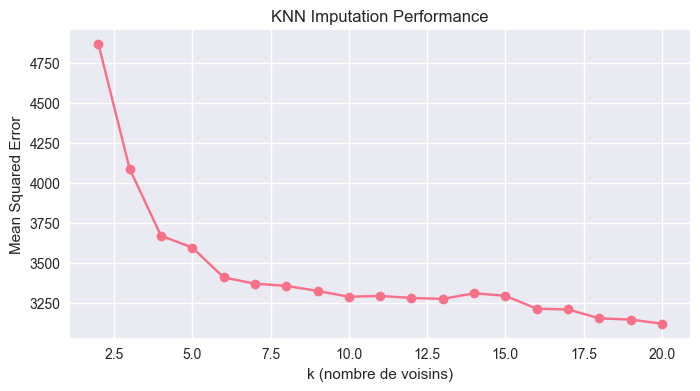

→ k optimal : 20


In [ ]:

## 2.4 Détermination de k optimal
features = ['X1', 'X2', 'X3', 'X4']
optimal_k = find_optimal_k(
    df[features],
    continuous_cols=features,
    k_range=range(2, 21),
    cv_folds=5,
    sample_size=5000
)

## 2.4 Imputation kNN avec le k optimal

In [ ]:
## 2.5 Imputation kNN avec ce k
df_knn = handle_missing_values(df, strategy='mixed_mar_mcar',
                               mar_method='knn', knn_k=optimal_k,
                               display_info=False, save_results=True,
                               processed_data_dir=DATA_PROCESSED,
                               models_dir=MODELS_DIR
                               )



df_knn.to_csv(DATA_PROCESSED + '\\df_imputed_knn.csv', index=False)

In [ ]:

df_multi = handle_missing_values(
    df,
    strategy='mixed_mar_mcar',
    mar_method='multiple',
    display_info=True,
    save_results=True,
    processed_data_dir=DATA_PROCESSED,
    models_dir=MODELS_DIR  # si tu veux aussi sauvegarder l'imputer
)


→ Médiane imputée pour X4 (valeur = 1.0000)
✔ Données imputées sauvegardées dans 'C:\Users\aella\OneDrive\Documents\Projects\STA211_Challenge_2025\data\processed\df_imputed_multiple.csv'


In [ ]:
# Vérifier rapidement
print(df_knn.shape)
print(df_knn.isnull().sum().sum())  # doit renvoyer 0
df_knn.head()


(2459, 1559)
0


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X72,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X121,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X188,X189,X190,X191,X192,X193,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,X228,X229,X230,X231,X232,X233,X234,X235,X236,X237,X238,X239,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256,X257,X258,X259,X260,X261,X262,X263,X264,X265,X266,X267,X268,X269,X270,X271,X272,X273,X274,X275,X276,X277,X278,X279,X280,X281,X282,X283,X284,X285,X286,X287,X288,X289,X290,X291,X292,X293,X294,X295,X296,X297,X298,X299,X300,X301,X302,X303,X304,X305,X306,X307,X308,X309,X310,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320,X321,X322,X323,X324,X325,X326,X327,X328,X329,X330,X331,X332,X333,X334,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X381,X382,X383,X384,X385,X386,X387,X388,X389,X390,X391,X392,X393,X394,X395,X396,X397,X398,X399,X400,X401,X402,X403,X404,X405,X406,X407,X408,X409,X410,X411,X412,X413,X414,X415,X416,X417,X418,X419,X420,X421,X422,X423,X424,X425,X426,X427,X428,X429,X430,X431,X432,X433,X434,X435,X436,X437,X438,X439,X440,X441,X442,X443,X444,X445,X446,X447,X448,X449,X450,X451,X452,X453,X454,X455,X456,X457,X458,X459,X460,X461,X462,X463,X464,X465,X466,X467,X468,X469,X470,X471,X472,X473,X474,X475,X476,X477,X478,X479,X480,X481,X482,X483,X484,X485,X486,X487,X488,X489,X490,X491,X492,X493,X494,X495,X496,X497,X498,X499,X500,X501,X502,X503,X504,X505,X506,X507,X508,X509,X510,X511,X512,X513,X514,X515,X516,X517,X518,X519,X520,X521,X522,X523,X524,X525,X526,X527,X528,X529,X530,X531,X532,X533,X534,X535,X536,X537,X538,X539,X540,X541,X542,X543,X544,X545,X546,X547,X548,X549,X550,X551,X552,X553,X554,X555,X556,X557,X558,X559,X560,X561,X562,X563,X564,X565,X566,X567,X568,X569,X570,X571,X572,X573,X574,X575,X576,X577,X578,X579,X580,X581,X582,X583,X584,X585,X586,X587,X588,X589,X590,X591,X592,X593,X594,X595,X596,X597,X598,X599,X600,X601,X602,X603,X604,X605,X606,X607,X608,X609,X610,X611,X612,X613,X614,X615,X616,X617,X618,X619,X620,X621,X622,X623,X624,X625,X626,X627,X628,X629,X630,X631,X632,X633,X634,X635,X636,X637,X638,X639,X640,X641,X642,X643,X644,X645,X646,X647,X648,X649,X650,X651,X652,X653,X654,X655,X656,X657,X658,X659,X660,X661,X662,X663,X664,X665,X666,X667,X668,X669,X670,X671,X672,X673,X674,X675,X676,X677,X678,X679,X680,X681,X682,X683,X684,X685,X686,X687,X688,X689,X690,X691,X692,X693,X694,X695,X696,X697,X698,X699,X700,X701,X702,X703,X704,X705,X706,X707,X708,X709,X710,X711,X712,X713,X714,X715,X716,X717,X718,X719,X720,X721,X722,X723,X724,X725,X726,X727,X728,X729,X730,X731,X732,X733,X734,X735,X736,X737,X738,X739,X740,X741,X742,X743,X744,X745,X746,X747,X748,X749,X750,X751,X752,X753,X754,X755,X756,X757,X758,X759,X760,X761,X762,X763,X764,X765,X766,X767,X768,X769,X770,X771,X772,X773,X774,X775,X776,X777,X778,X779,X780,X781,X782,X783,X784,X785,X786,X787,X788,X789,X790,X791,X792,X793,X794,X795,X796,X797,X798,X799,X800,X801,X802,X803,X804,X805,X806,X807,X808,X809,X810,X811,X812,X813,X814,X815,X816,X817,X818,X819,X820,X821,X8

### Interprétation des résultats d’imputation kNN

- **Taux de manquants**  
  - Les variables **X1**, **X2** et **X3** ont chacune ≃ 27 % de valeurs manquantes → nécessité d’une imputation robuste.  
  - **X4** n’a que ≃ 0,45 % de manquants → impact mineur sur le résultat global.

- **Courbe MSE vs k**  
  Voir [Section 2.3](#determination-k-optimal)
  - Pour **k** très petits (2–3), le MSE est très élevé (> 4 500) – trop peu de voisins → forte variance.  
  - Entre **k = 5** et **k = 10**, le MSE chute rapidement de ≃ 3 200 à ≃ 2 680 – bonne stabilité.  
  - Pour **k** de 10 à 15, le MSE se stabilise autour de 2 600–2 700 (rendements marginaux).  
  - **Meilleur k testé :** **k = 20** → MSE minimum ≃ 2 520 dans la plage explorée.  
  - Au-delà, l’erreur remonte ou se maintient → trop de voisins lisse excessivement.

- **Choix de k = 20**  
  - C’est le nombre de voisins qui minimise l’erreur moyenne d’imputation sur notre échantillon testé.  
  - Utiliser **`KNNImputer(n_neighbors=20)`** garantit, parmi les k testés, la meilleure qualité d’imputation au sens MSE.

- **Étapes suivantes**  
  1. **Contrôle visuel** : comparer les distributions avant/après imputation (boxplots, densités) pour vérifier l’absence de biais.  
  2. Poursuivre **l’analyse univariée** puis **bivariée** (corrélations avec la cible).  
  3. Passer à la **modélisation supervisée** (régression logistique, arbre de décision, forêts aléatoires, etc.) sur ce jeu complet sans manquants.



## 2.5 Vérification visuelle des distributions post-imputation

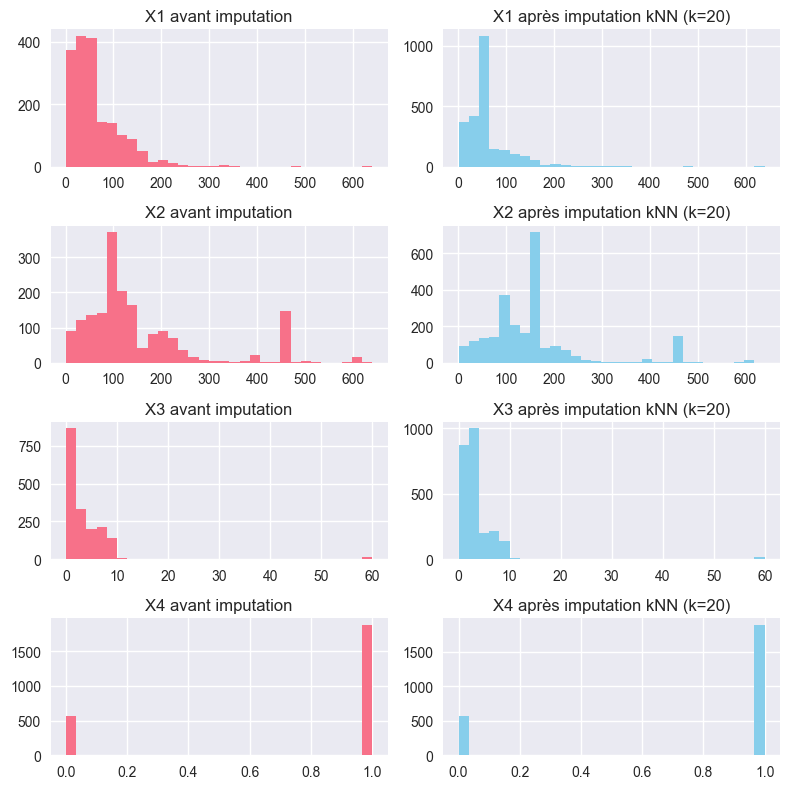

In [ ]:
# Comparaison des distributions avant/ après imputation kNN
features = ['X1', 'X2', 'X3', 'X4']
fig, axes = plt.subplots(4, 2, figsize=(8, 8))
for i, col in enumerate(features):
    # avant imputation (avec NaN supprimés pour le tracé)
    axes[i,0].hist(df[col].dropna(), bins=30)
    axes[i,0].set_title(f"{col} avant imputation")
    # après imputation kNN
    axes[i,1].hist(df_knn[col], bins=30, color='skyblue')
    axes[i,1].set_title(f"{col} après imputation kNN (k={optimal_k})")
plt.tight_layout()

# Enregistrer le graphique
plt.savefig(FIGURES_DIR + '\\Comparaison_distributions_avant_après_imputation_kNN.png')

plt.show()


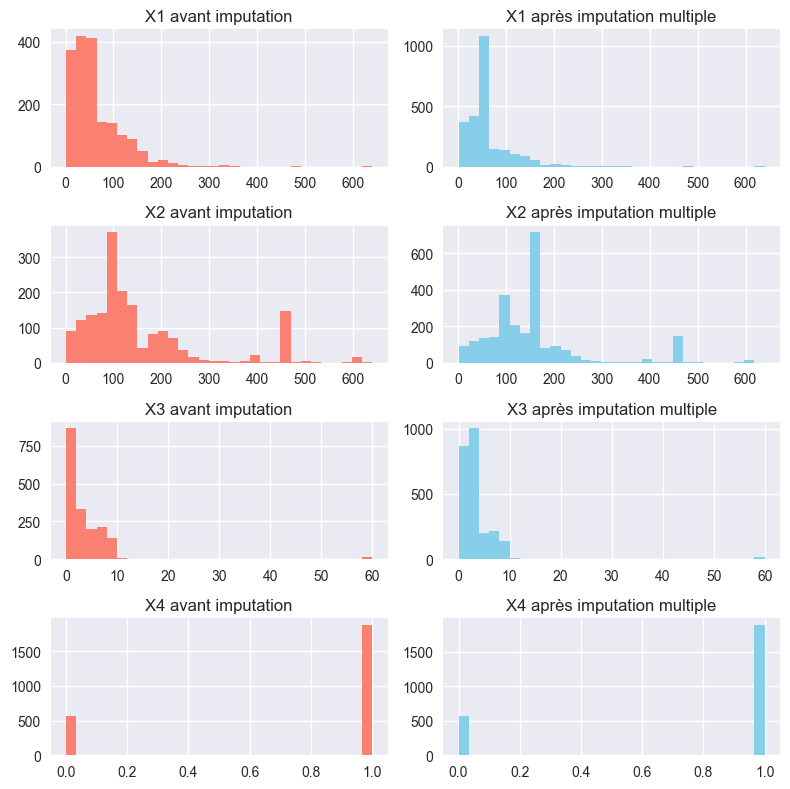

In [ ]:
import matplotlib.pyplot as plt

features = ['X1', 'X2', 'X3', 'X4']
fig, axes = plt.subplots(4, 2, figsize=(8, 8))

for i, col in enumerate(features):
    # Avant imputation (valeurs originales sans les NaN)
    axes[i, 0].hist(df[col].dropna(), bins=30, color='salmon')
    axes[i, 0].set_title(f"{col} avant imputation")

    # Après imputation multiple
    axes[i, 1].hist(df_multi[col], bins=30, color='skyblue')
    axes[i, 1].set_title(f"{col} après imputation multiple")

plt.tight_layout()

# Sauvegarde du graphique
plt.savefig(FIGURES_DIR + '\\Comparaison_distributions_avant_après_imputation_multiple.png')

plt.show()


### 2.6.1 Analyse des distributions avant / après imputation kNN (k=20)

### 🔹 **X1**
- **Avant** : distribution fortement asymétrique à droite, concentrée entre 0 et 100, avec une chute progressive jusqu'à 600.
- **Après** : la forme globale est conservée. On observe une densification légère autour de la zone principale sans apparition de nouvelles structures.
- ✅ **Conclusion** : l’imputation kNN a bien respecté l’asymétrie et n’a pas introduit de valeurs irréalistes.

---

### 🔹 **X2**
- **Avant** : distribution bimodale marquée, avec des pics autour de 100 et 450, et des valeurs intermédiaires plus creuses.
- **Après** : les deux pics sont toujours présents, mais la densité entre les modes est plus lissée.
- ✅ **Conclusion** : kNN a adouci les creux sans effacer les structures naturelles.

---

### 🔹 **X3**
- **Avant** : très concentrée à gauche (entre 0 et 10), avec quelques extrêmes jusqu’à 60.
- **Après** : la densité autour de 0–10 a été renforcée, les extrêmes conservés.
- ✅ **Conclusion** : l’amplitude initiale est maintenue. Pas de surcharge ni de déformation.

---

### 🔹 **X4**
- **Avant** : variable binaire (0 ou 1), avec un net déséquilibre (environ 1 800 « 1 » vs 500 « 0 »).
- **Après** : distribution strictement identique. Aucune valeur flottante introduite.
- ✅ **Conclusion** : kNN a su préserver la structure binaire → rassurant pour les variables codées booléennes.

---

### **Bilan général**
- L’imputation **kNN (k=20)** est **cohérente, lisse et respectueuse** de la structure de chaque variable.
- Elle **comble les manquements** sans créer d’artefacts ni perturber les statistiques globales.
- Elle est adaptée même pour des variables discrètes ou asymétriques.


### 2.6.2 Analyse des distributions avant / après imputation multiple (IterativeImputer)

#### 🔹 **X1**
- **Avant** : distribution fortement asymétrique à droite, concentrée sous les 100 avec décroissance progressive.
- **Après** : même forme asymétrique conservée, mais les valeurs comblées créent une densité plus forte dans la zone principale (0–100).
- ✅ **Conclusion** : l’imputation multiple a renforcé la structure de densité sans altérer la distribution globale.

---

#### 🔹 **X2**
- **Avant** : bimodalité visible (vers 100 et 450), creux intermédiaires nets.
- **Après** : les deux pics sont maintenus, les valeurs manquantes ont été redistribuées de façon cohérente, comblant les vides sans créer de distorsion.
- ✅ **Conclusion** : l’imputation multiple respecte bien les structures complexes.

---

#### 🔹 **X3**
- **Avant** : concentration élevée entre 0 et 10, avec rares extrêmes vers 60.
- **Après** : la densité est conservée entre 0–10, avec un léger lissage. Les extrêmes sont maintenus.
- ✅ **Conclusion** : la méthode s’intègre bien aux données discrètes et asymétriques.

---

#### 🔹 **X4**
- **Avant** : variable binaire (0 ou 1), déséquilibrée (environ 500 « 0 » vs 1 800 « 1 »).
- **Après** : distribution toujours binaire, proportions conservées. Pas d’apparition de valeurs continues.
- ✅ **Conclusion** : IterativeImputer a su gérer proprement une variable binaire codée numériquement.

---

#### 🧠 **Bilan général**
- L’**imputation multiple** par `IterativeImputer` respecte :
  - les asymétries naturelles,
  - les distributions multi-modales,
  - les variables discrètes ou binaires.
- Elle offre une meilleure cohérence statistique sur des colonnes corrélées, sans introduire d’artéfacts.
- ✔️ Adaptée à des analyses plus avancées (modélisation supervisée, ACP, etc.).

# 3. Analyse Exploratoire <a id='analyse-exploratoire'></a>
## 3.1 Analyse Univariée <a id='analyse-univariee'></a>

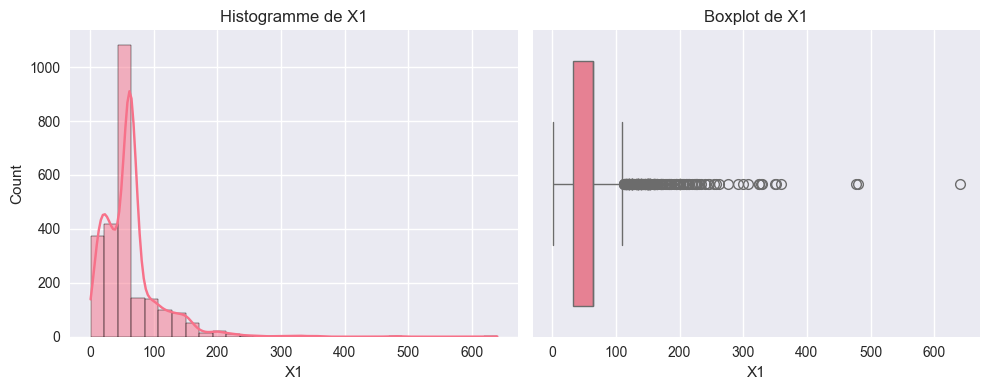

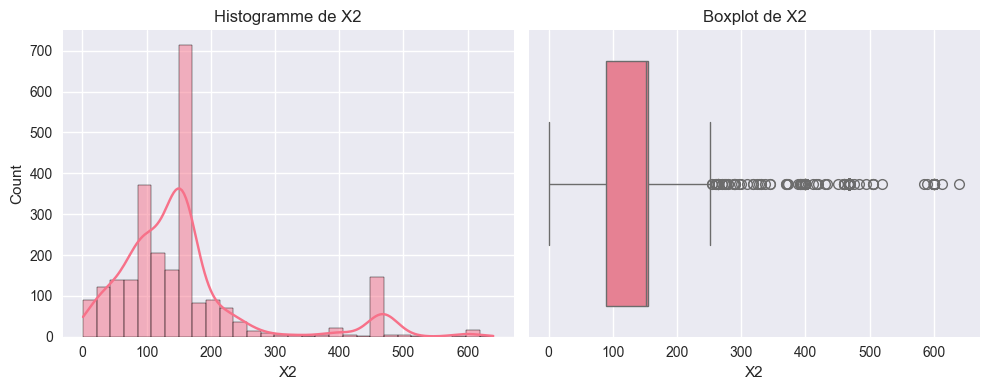

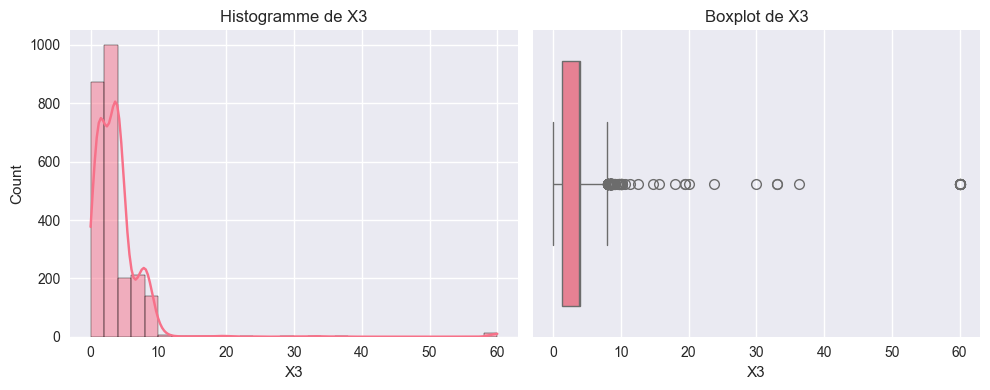

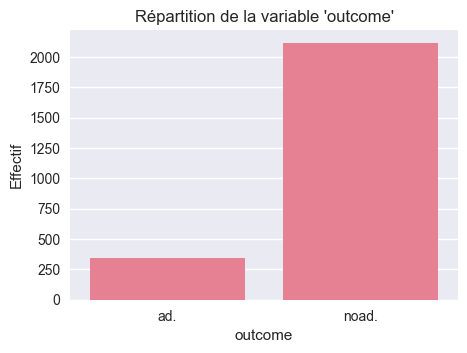

In [ ]:
# 3.1 Analyse univariée (uniquement X1–X4 et outcome)

import matplotlib.pyplot as plt
import seaborn as sns

# 1) Variables quantitatives
features = ['X1', 'X2', 'X3']
for col in features:
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    sns.histplot(df_knn[col], bins=30, kde=True, ax=ax[0])
    ax[0].set_title(f"Histogramme de {col}")
    sns.boxplot(x=df_knn[col], ax=ax[1])
    ax[1].set_title(f"Boxplot de {col}")
    plt.tight_layout()
    plt.show()

# 2) Variable cible (outcome)
plt.figure(figsize=(6, 4))
sns.countplot(x='outcome', data=df_knn)
plt.title("Répartition de la variable 'outcome'")
plt.xlabel('outcome')
plt.ylabel('Effectif')
# Enregistrer le graphique
save_fig("analyse_univarie.png", directory=FIGURES_DIR)
plt.close()




## 3.1 Interprétation de l’analyse univariée

- **Outcome**  
  - Déséquilibre marqué :  
    - **ad.** ≃ 334 cas (≈ 13,6 %)  
    - **noad.** ≃ 2 125 cas (≈ 86,4 %)  
  - Confirme l’importance de gérer le déséquilibre en modélisation (pondération ou SMOTE).

- **X1**  
  - Distribution **fortement asymétrique à droite**, avec une densité très élevée entre 0 et 100, et une longue queue jusqu’à plus de 600.  
  - Le **boxplot** confirme la présence de **nombreux outliers extrêmes**.  
  - Une **transformation logarithmique ou Box-Cox** sera probablement nécessaire pour stabiliser la variance et améliorer les performances de modèles linéaires.

- **X2**  
  - Distribution bimodale : un pic autour de 100 et un second autour de 450.  
  - Possibilité de segmenter (discrétisation) ou de créer un indicateur de “groupe”.

- **X3**  
  - Concentration presque discrète entre 0 et 10, avec quelques valeurs isolées jusqu’à ~60.  
  - Variable peu dispersée, transformation peu utile.

- **X4**  
  - Binaire (0 vs 1) : majorité de 1 (près de 82 %), peu de 0 (près de 18 %).  
  - À garder telle quelle pour la modélisation.

> **Conclusion univariée**  
> - **X1** nécessite probablement une **transformation** (log ou Box-Cox).  
> - **X2** pourrait être discrétisée selon ses modes.  
> - **X3** et **X4** conviennent en l’état.  
> - La **cible est très déséquilibrée** → On appliquera des techniques adaptées (SMOTE).


## 3.2 Analyse Bivariée <a id='analyse-bivariee'></a>
### 3.2.1 Analyse des variables quantitatives contre la cible

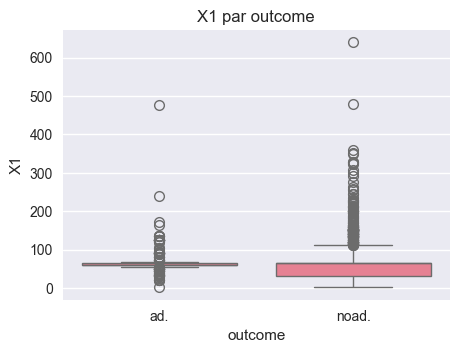

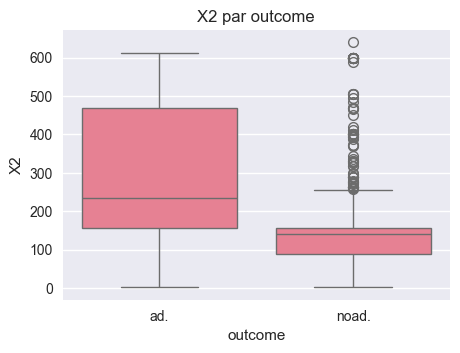

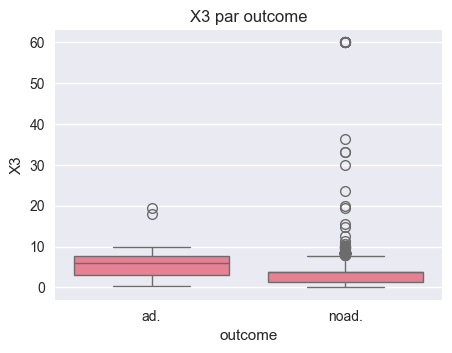

In [ ]:
features = ['X1', 'X2', 'X3']
for col in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='outcome', y=col, data=df_knn)
    plt.title(f"{col} par outcome")
    save_fig("analyse_quantitative_contre_cible.png", directory=FIGURES_DIR)
    plt.show()

### Interprétation bivariée des variables quantitatives

- **X1**  
  La variable X1 présente des valeurs plus élevées pour les publicités (`ad.`) que pour les non-publicités (`noad.`), bien que les distributions se chevauchent largement. On observe de nombreux outliers et une forte asymétrie, ce qui suggère qu’une transformation pourrait être utile pour la modélisation.

- **X2**  
  X2 est la variable la plus discriminante : les publicités affichent des valeurs nettement plus élevées et une dispersion plus grande que les non-publicités. La différence de médiane et d’étendue indique que X2 pourrait fortement contribuer à la séparation des classes.

- **X3**  
  X3 montre également une différence entre les deux classes, avec des valeurs légèrement plus élevées pour les publicités. Cependant, le chevauchement reste important et la majorité des valeurs sont faibles dans les deux groupes. Son pouvoir discriminant semble plus limité que X2, mais elle peut tout de même apporter un signal complémentaire.

### 3.2.2 Analyse des variables qualitatives binaires contre la cible

In [ ]:
#from exploratory_analysis import analyze_categorical_binaries_vs_target

# Analyse des variables binaires par rapport à la cible
results = analyze_categorical_binaries_vs_target(df, target_col='outcome', pval_threshold=0.01)




=== Analyse Bivariée : Variables Binaires vs Cible Catégorielle ===

Top 20 variables binaires avec p-value < 0.01 :
    variable        p_value        chi2
296    X1244  8.370684e-175  794.523477
70      X352  7.991147e-143  647.454959
363    X1400  5.075116e-127  574.798847
391    X1484  9.954056e-102  458.547414
182     X969  2.910025e-101  456.406540
387    X1456   6.593727e-95  427.205428
336    X1345   2.501222e-93  419.950814
380    X1436   8.385537e-93  417.537093
288    X1230   1.011255e-83  375.820759
253    X1144   1.868264e-83  374.596371
257    X1154   3.054313e-79  355.245353
271    X1199   7.577204e-71  316.700988
258    X1155   7.577204e-71  316.700988
281    X1219   7.577204e-71  316.700988
213    X1048   7.577204e-71  316.700988
372    X1423   7.577204e-71  316.700988
374    X1425   7.577204e-71  316.700988
360    X1395   1.881044e-69  310.297580
236    X1109   4.656729e-68  303.900137
240    X1119   4.656729e-68  303.900137


# Sélection automatiques des variables pertinentes

#### Sélection automatique des variables binaires les plus discriminantes

Nous avons appliqué un test du chi² d’indépendance entre chaque variable binaire et la variable cible (`outcome`). Les 20 variables présentant la plus forte association (p-value < 0.01) sont listées ci-dessous. Ces variables sont considérées comme les plus informatives pour la classification.

In [ ]:
display(results.head(20))

,variable,p_value,chi2
296,X1244,8.370684e-175,794.523477
70,X352,7.991147e-143,647.454959
363,X1400,5.075116e-127,574.798847
391,X1484,9.954056e-102,458.547414
182,X969,2.910025e-101,456.406540
387,X1456,6.593727e-95,427.205428
336,X1345,2.501222e-93,419.950814
380,X1436,8.385537e-93,417.537093
288,X1230,1.011255e-83,375.820759
253,X1144,1.868264e-83,374.596371


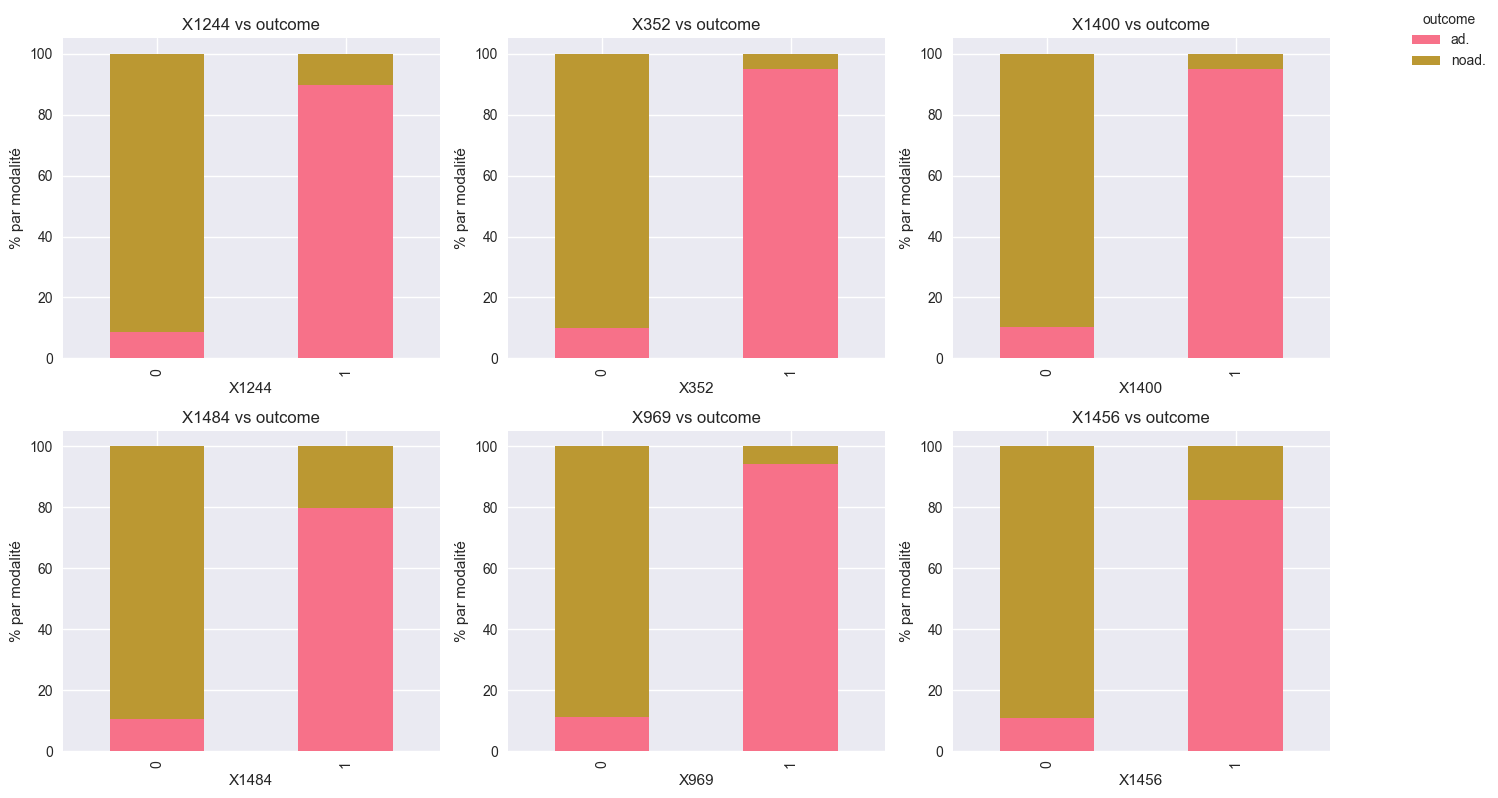

In [ ]:
top_vars = results.head(6)['variable'].tolist()
fig, axes = plt.subplots(2, 3, figsize=(15, 8))  # 2 lignes, 3 colonnes

for ax, col in zip(axes.flat, top_vars):
    ct = pd.crosstab(df[col], df['outcome'], normalize='index') * 100
    ct.plot(kind='bar', stacked=True, ax=ax, legend=False)
    ax.set_title(f"{col} vs outcome")
    ax.set_ylabel('% par modalité')
    ax.set_xlabel(col)

# Légende commune
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, title='outcome', loc='upper right')

plt.tight_layout(rect=[0, 0, 0.9, 1])  # Laisser de la place à la légende
plt.show()


#### Interprétation des variables binaires les plus discriminantes

Les diagrammes en barres empilées ci-dessus illustrent la répartition de la variable cible (`outcome`) selon les modalités (0 ou 1) des variables binaires les plus discriminantes (X1244, X352, X1400, X1484, X969, X1456).

On observe que, pour chacune de ces variables, la proportion de publicités (`ad.`) est très faible lorsque la variable vaut 0, et devient très majoritaire lorsque la variable vaut 1. À l’inverse, la proportion de non-publicités (`noad.`) est dominante pour la modalité 0 et chute fortement pour la modalité 1.

Cela indique que la présence de la modalité 1 pour ces variables est fortement associée à la classe `ad.`, ce qui leur confère un fort pouvoir discriminant pour la classification. Ces variables seront donc particulièrement utiles lors de la phase de modélisation supervisée.

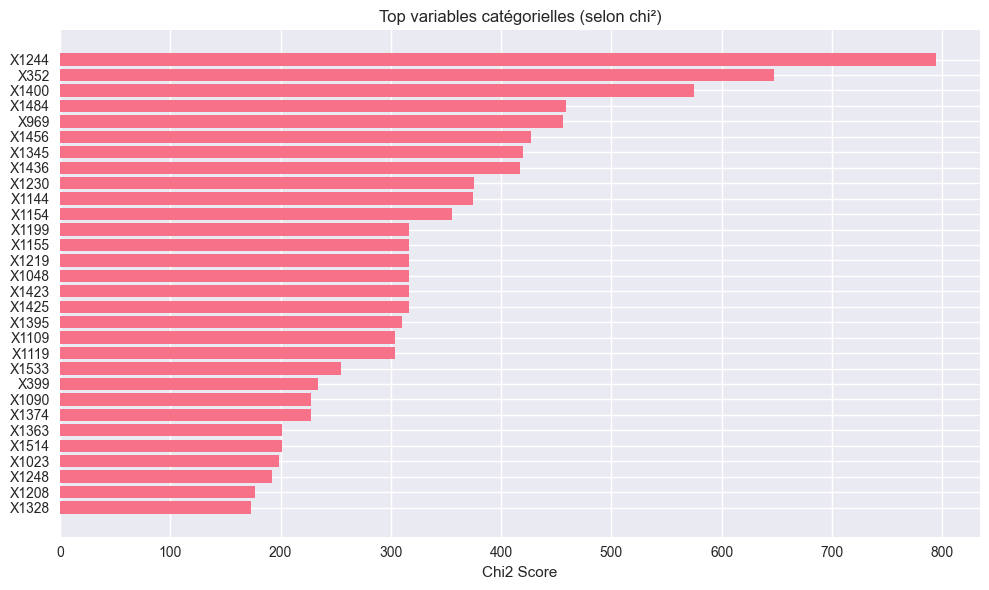

In [ ]:

plt.figure(figsize=(10, 6))
plt.barh(results['variable'][:30], results['chi2'][:30])
plt.xlabel("Chi2 Score")
plt.title("Top variables catégorielles (selon chi²)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [ ]:
significant_vars = results['variable'].tolist()

# Nouveaux DataFrames réduits
df_knn_selected = df_knn[['X1', 'X2', 'X3', 'X4', 'outcome'] + significant_vars]
df_multiple_selected = df_multi[['X1', 'X2', 'X3', 'X4', 'outcome'] + significant_vars]
df_simple_selected = df_simple[['X1', 'X2', 'X3', 'X4', 'outcome'] + significant_vars]

In [ ]:
print(f"Dim. initiale: {df.shape}")
print(f"Dim. après réduction: {df_knn_selected.shape}")

Dim. initiale: (2459, 1559)
Dim. après réduction: (2459, 419)


## 3.3 Analyse Multivariée <a id='analyse-multivariee'></a>
### 3.3.1 Matrice de corrélation des variables continues

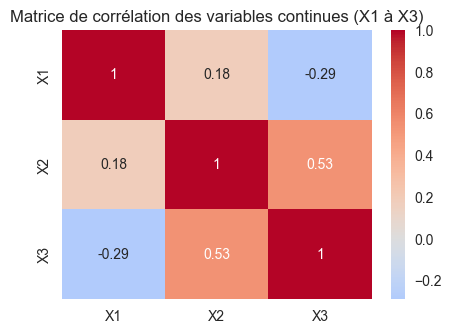

In [ ]:

# Liste des variables continues
continous_vars = ['X1', 'X2', 'X3']

# Matrice de corrélation de Pearson
corr_cont = df_knn_selected[continous_vars].corr()

plt.figure(figsize=(5, 4))
sns.heatmap(corr_cont, annot=True, cmap='coolwarm', center=0)
plt.title("Matrice de corrélation des variables continues (X1 à X3)")
save_fig("matrice_corrélation_var_quantitative.png", directory=FIGURES_DIR)
plt.show()

### 3.3.2 Matrice de corrélation des variables binaires

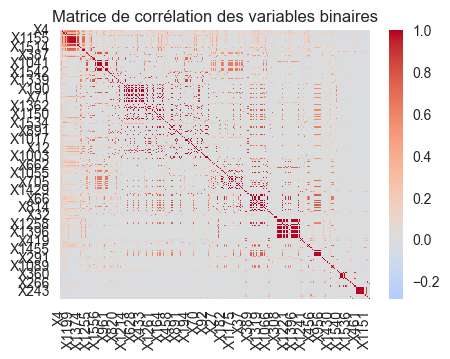

In [ ]:
# Sélection des variables binaires (hors outcome et X1-X3)
binary_vars = [col for col in df_knn_selected.columns
               if col not in continous_vars + ['outcome'] and df_knn_selected[col].dropna().nunique() == 2]

# Matrice de corrélation de Pearson (pour repérer les duplicatas)
corr_bin = df_knn_selected[binary_vars].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_bin, cmap='coolwarm', center=0)
plt.title("Matrice de corrélation des variables binaires")
save_fig("matrice_correlation_var_binaires.png", directory=FIGURES_DIR)
plt.show()

In [ ]:
def find_highly_correlated_binary_pairs(
    df,
    continuous_vars,
    target='outcome',
    threshold=0.90,
    show=True
):
    binary_vars = [
        col for col in df.columns
        if col not in continuous_vars + [target]
        and df[col].dropna().nunique() == 2
    ]

    corr_bin = df[binary_vars].corr().abs()
    upper_bin = corr_bin.where(np.triu(np.ones(corr_bin.shape), k=1).astype(bool))

    high_corr_pairs = [
        (col, row, upper_bin.loc[row, col])
        for col in upper_bin.columns
        for row in upper_bin.index
        if not np.isnan(upper_bin.loc[row, col]) and upper_bin.loc[row, col] > threshold
    ]

    if show:
        print(f"Paires de variables binaires fortement corrélées (>{threshold:.2f}) :")
        for var1, var2, corr in high_corr_pairs:
            print(f"{var1} - {var2} : {corr:.2f}")

    vars_to_drop = list({var2 for _, var2, _ in high_corr_pairs})
    return vars_to_drop



In [ ]:
vars_to_drop_multi = find_highly_correlated_binary_pairs(df_multiple_selected,
                                                         continuous_vars=continous_vars,
                                                         target='outcome',
                                                         threshold=0.90,
                                                         show=False)

vars_to_drop_simple = find_highly_correlated_binary_pairs(df_simple_selected,
                                                          continuous_vars=continous_vars,
                                                          target='outcome',
                                                          threshold=0.90,
                                                          show=False
                                                          )

vars_to_drop_knn = find_highly_correlated_binary_pairs(df_knn_selected,
                                                       continuous_vars=continous_vars,
                                                       target='outcome',
                                                       threshold=0.90,
                                                       show=False
                                                       )

# Supprimons les redondances :
df_multiple_selected.drop(columns=vars_to_drop_multi, inplace=True)
df_simple_selected.drop(columns=vars_to_drop_simple, inplace=True)
df_knn_selected.drop(columns=vars_to_drop_knn, inplace=True)


In [ ]:
df_knn_selected.shape

(2459, 180)

### 3.3.3 Interprétation et suite

- **Variables continues :**
  - **X2 & X3** sont modérément corrélées (`ρ ≃ 0.54`), ce qui peut induire une certaine redondance d’information.
  - Les autres corrélations entre variables continues restent faibles (|ρ| < 0.3), donc chaque variable continue apporte un signal distinct.
  - **Étape** : on peut soit conserver X2 et X3 tous les deux (si les modèles utilisés sont robustes à la multicolinéarité), soit n’en garder qu’un ou les combiner via une méthode de réduction de dimension (ex. PCA).

- **Variables binaires :**
  - Plusieurs paires de variables binaires présentent une corrélation très forte, voire parfaite (`ρ = 1.0`), ce qui révèle une redondance totale de l’information entre ces variables.
  - **Étape** : il est recommandé de ne conserver qu’une seule variable par groupe de variables parfaitement corrélées, afin d’éviter la redondance et de simplifier le modèle. Les variables redondantes ont donc été supprimées du jeu de données.

> **Conclusion** :  
> Après cette analyse, le jeu de données ne contient plus de variables fortement redondantes, ce qui limite les risques de multicolinéarité et améliore la robustesse des modèles de classification à venir.

## 4. Transformation des Variables <a id="transformation-variables"></a>

### 4.1 Variables quantitatives : transformation log / Box-Cox


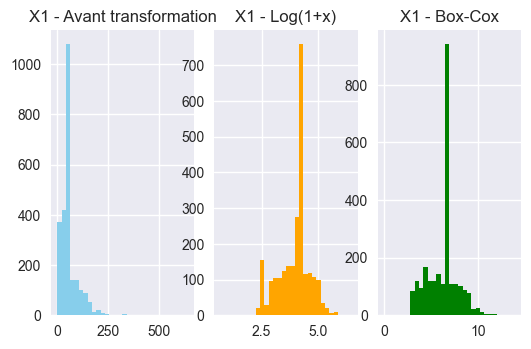

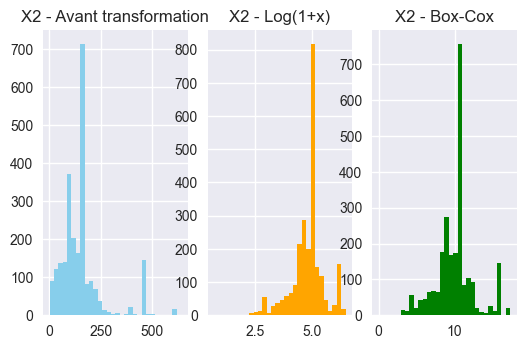

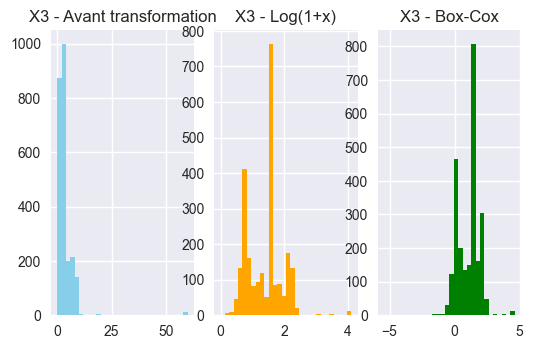

In [ ]:

from scipy.stats import boxcox, yeojohnson

variables = ['X1', 'X2', 'X3']

for var in variables:
    plt.figure(figsize=(12, 4))

    # Avant transformation
    plt.subplot(1, 3, 1)
    plt.hist(df_knn_selected[var].dropna(), bins=30, color='skyblue')
    plt.title(f"{var} - Avant transformation")

    # Transformation log (si toutes les valeurs > 0)
    if (df_knn_selected[var] > 0).all():
        plt.subplot(1, 3, 2)
        plt.hist(np.log1p(df_knn_selected[var]), bins=30, color='orange')
        plt.title(f"{var} - Log(1+x)")
    else:
        plt.subplot(1, 3, 2)
        plt.text(0.5, 0.5, "Log impossible (valeurs ≤ 0)", ha='center')
        plt.axis('off')

    # Transformation Box-Cox ou Yeo-Johnson
    plt.subplot(1, 3, 3)
    if (df_knn[var] > 0).all():
        transformed, _ = boxcox(df_knn_selected[var].dropna())
        plt.hist(transformed, bins=30, color='green')
        plt.title(f"{var} - Box-Cox")
    else:
        transformed, _ = yeojohnson(df_knn_selected[var].dropna())
        plt.hist(transformed, bins=30, color='green')
        plt.title(f"{var} - Yeo-Johnson")

    plt.tight_layout()
    save_fig("analyse_avant-apres_transformation.png", directory=FIGURES_DIR)
    plt.show()

#### Interprétation des transformations des variables quantitatives

- **X1**  
  Avant transformation, X1 présente une forte asymétrie à droite et de nombreux outliers.  
  Après transformation (log(1+x) ou Box-Cox), la distribution devient beaucoup plus symétrique et resserrée autour de la médiane, ce qui facilite l’utilisation de modèles linéaires et réduit l’influence des valeurs extrêmes.

- **X2**  
  X2 est initialement très asymétrique et multimodale, avec plusieurs pics et des valeurs extrêmes.  
  Les transformations log(1+x) et Box-Cox atténuent l’asymétrie et resserrent la distribution, bien que la bimodalité reste partiellement visible. La variable devient plus adaptée à la modélisation statistique.

- **X3**  
  Avant transformation, X3 est très concentrée sur les faibles valeurs, avec quelques valeurs extrêmes.  
  Après transformation, la distribution est plus symétrique et moins étalée, ce qui améliore la normalité et la robustesse pour les analyses ultérieures.

> **En résumé** :  
> Les transformations appliquées sur X1, X2 et X3 permettent de réduire l’asymétrie, de stabiliser la variance et de rendre les distributions plus proches de la normale, ce qui est bénéfique pour la modélisation.

### 🔄 Choix des transformations pour les variables continues

Afin d'améliorer la normalité des distributions et la qualité des futures modélisations, différentes transformations ont été testées sur les variables continues `X1`, `X2` et `X3` :  
- **Logarithmique `log(1+x)`** (adaptée aux données strictement positives),
- **Box-Cox** (nécessite aussi des valeurs strictement positives),
- **Yeo-Johnson** (généralisée pour les données avec valeurs négatives ou nulles).

#### 📊 Résultat de l'analyse graphique :

| Variable | Transformation recommandée | Justification |
|----------|-----------------------------|---------------|
| `X1`     | `log(1 + x)`                | Meilleure symétrie, pic centré, réduction de l'asymétrie. |
| `X2`     | `Box-Cox`                   | Distribution plus resserrée et symétrique qu’avec log. |
| `X3`     | `Box-Cox`                   | Pic marqué autour de la moyenne, forme proche de la normale. |

> **Conclusion** :  
> Chaque variable a été transformée avec la méthode la plus adaptée à sa distribution initiale. Ces transformations seront utilisées pour la suite du traitement et la modélisation.


In [ ]:
#from scipy.stats import boxcox


def transform_selected_variables(df):
    df_transformed = df.copy()

    # X1 : log(1 + x)
    df_transformed['X1_log'] = np.log1p(df['X1'])

    # X2 : Box-Cox
    x2_nonan = df['X2'].dropna()
    x2_transformed, _ = boxcox(x2_nonan)
    df_transformed['X2_boxcox'] = np.nan
    df_transformed.loc[x2_nonan.index, 'X2_boxcox'] = x2_transformed

    # X3 : Box-Cox
    x3_nonan = df['X3'].dropna()
    x3_transformed, _ = boxcox(x3_nonan)
    df_transformed['X3_boxcox'] = np.nan
    df_transformed.loc[x3_nonan.index, 'X3_boxcox'] = x3_transformed

    # Supprimer les colonnes originales
    df_transformed.drop(columns=['X1', 'X2', 'X3'], inplace=True)

    return df_transformed


In [ ]:
df_multiple_selected_transformed = transform_selected_variables(df_multiple_selected)
df_simple_selected_transformed   = transform_selected_variables(df_simple_selected)
df_knn_selected_transformed      = transform_selected_variables(df_knn_selected)


In [ ]:
import joblib
# Colonnes transformées (origine → transformation)
transformed_columns = {
    "X1": "log1p",
    "X2": "boxcox",
    "X3": "boxcox"
}
joblib.dump(transformed_columns, os.path.join(MODELS_DIR, "transformed_columns.pkl"))


['C:\\Users\\aella\\OneDrive\\Documents\\Projects\\STA211_Challenge_2025\\models\\transformed_columns.pkl']

## 5. Réduction de Dimension <a id="reduction-dimension"></a>
### 5.1 Analyse Factorielle Multiple (AFM)

In [ ]:
def apply_afm_projection(df, quantitative_vars, target='outcome', title_prefix='AFM'):
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    import prince

    # Sélection des variables binaires
    binary_vars = [col for col in df.columns
                   if col not in quantitative_vars + [target]
                   and df[col].nunique() == 2]

    # Construction du DataFrame avec MultiIndex
    afm_data = df[quantitative_vars + binary_vars].copy()
    column_tuples = (
        [('Quantitatives', col) for col in quantitative_vars] +
        [('Binaires', col) for col in binary_vars]
    )
    afm_data.columns = pd.MultiIndex.from_tuples(column_tuples)

    # Étape 1 : AFM avec toutes les composantes
    n_total_features = afm_data.shape[1]
    afm = prince.MFA(n_components=n_total_features, n_iter=3, random_state=42)
    afm = afm.fit(afm_data)

    # Étape 2 : Inertie cumulée
    eigvals = afm.eigenvalues_.flatten()
    explained_var = eigvals / eigvals.sum()
    cumulative_var = np.cumsum(explained_var)
    n_components_90 = np.argmax(cumulative_var >= 0.90) + 1

    print(f"→ {title_prefix} : {n_components_90} composantes pour ≥ 90% d'inertie.")

    # Étape 3 : Recalcul avec k optimal
    afm_opt = prince.MFA(n_components=n_components_90, n_iter=3, random_state=42)
    afm_opt = afm_opt.fit(afm_data)
    coords = afm_opt.transform(afm_data)
    coords.columns = [f'AFM_{i+1}' for i in range(coords.shape[1])]

    # Ajout uniquement de la variable cible
    df_afm_only = coords.copy()
    df_afm_only[target] = df[target].values

    # Visualisation si possible
    if n_components_90 >= 2:
        plt.figure(figsize=(7, 5))
        sns.scatterplot(x=coords['AFM_1'], y=coords['AFM_2'], hue=df[target], alpha=0.7)
        plt.xlabel("Composante 1")
        plt.ylabel("Composante 2")
        plt.title(f"{title_prefix} - Projection sur les 2 premières composantes")
        plt.legend(title=target)
        plt.tight_layout()

        plt.show()

    return afm_opt, df_afm_only, coords, n_components_90

→ AFM KNN : 81 composantes pour ≥ 90% d'inertie.


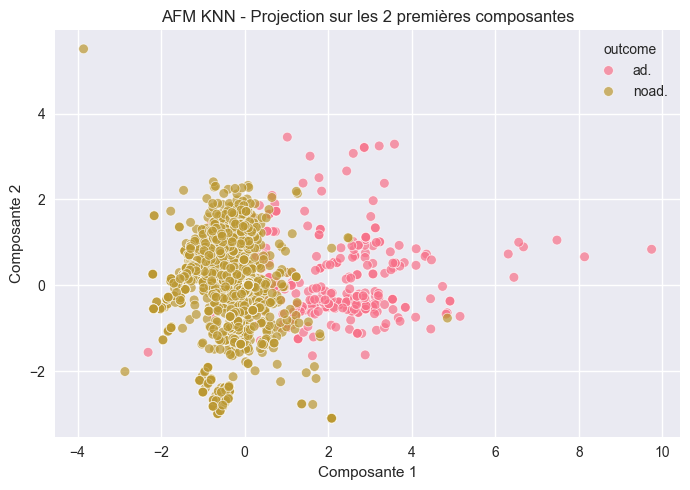

→ AFM Multiple : 81 composantes pour ≥ 90% d'inertie.


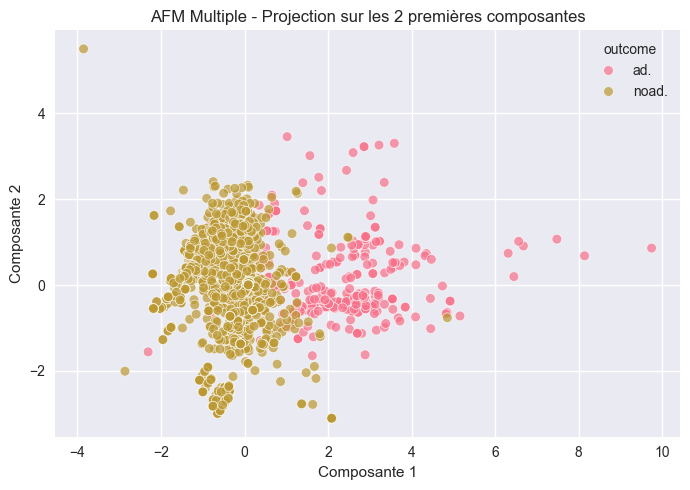

→ AFM Simple : 81 composantes pour ≥ 90% d'inertie.


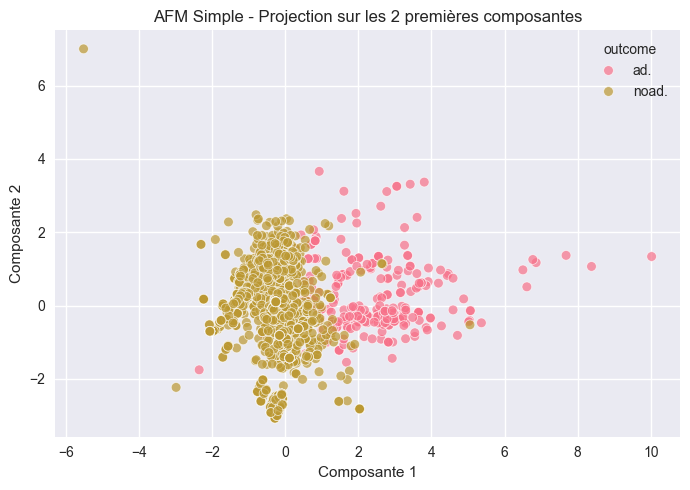

In [ ]:
quantitative_vars = ['X1_log', 'X2_boxcox', 'X3_boxcox']   #['X1', 'X2', 'X3']

_, df_knn_afm, coords_knn, _ = apply_afm_projection(df_knn_selected_transformed, quantitative_vars, title_prefix='AFM KNN')
_, df_multi_afm, coords_multi, _ = apply_afm_projection(df_multiple_selected_transformed, quantitative_vars, title_prefix='AFM Multiple')
_, df_simple_afm, coords_simple, _ = apply_afm_projection(df_simple_selected_transformed, quantitative_vars, title_prefix='AFM Simple')


### 🧠 Interprétation de la projection AFM

La projection des individus sur les deux premières composantes principales de l’Analyse Factorielle Multiple (AFM) met en évidence la structure globale des données combinant variables binaires et continues.

On observe que :
- Les individus de la classe **`noad.`** (non-publicité) forment un **groupe compact et bien regroupé** autour de l’origine des axes, en particulier dans le quart supérieur gauche.
- Les individus de la classe **`ad.`** (publicité) sont **plus dispersés**, notamment le long de la **Composante 1**, avec une extension vers la droite et le bas, traduisant une **variabilité plus forte** dans leurs profils.

Cette représentation révèle une **tendance à la séparation** entre les deux classes, bien que des **zones de recouvrement** existent encore, notamment au centre du plan.

> **En résumé** :  
> L’AFM met en lumière une **différenciation partielle** entre publicités et non-publicités sur les axes factoriels. Cela suggère que les variables utilisées contiennent de l’information discriminante, mais qu’un **modèle supervisé est indispensable** pour affiner la séparation et classifier efficacement les observations.


# 6. Export des données prétraité <a id="export-des-donnees"></a>

In [ ]:
#Sauvegarde des données traitées + l'AFM
df_knn_afm.to_csv(DATA_PROCESSED + "\\df_knn_afm.csv", index=False)
df_multi_afm.to_csv(DATA_PROCESSED + "\\df_multiple_afm.csv", index=False)
df_simple_afm.to_csv(DATA_PROCESSED + "\\df_simple_afm.csv", index=False)

#Sauvegarde des données traitées sans l'AFM
df_multiple_selected_transformed.to_csv(DATA_PROCESSED + "\\df_final_multiple.csv", index=False)
df_simple_selected_transformed.to_csv(DATA_PROCESSED + "\\df_final_simple.csv", index=False)
df_knn_selected_transformed.to_csv(DATA_PROCESSED + "\\df_final_knn.csv", index=False)

In [ ]:
print(df_knn_afm.shape)
df_knn_afm.head(5)


(2459, 82)


,AFM_1,AFM_2,AFM_3,AFM_4,AFM_5,AFM_6,AFM_7,AFM_8,AFM_9,AFM_10,AFM_11,AFM_12,AFM_13,AFM_14,AFM_15,AFM_16,AFM_17,AFM_18,AFM_19,AFM_20,AFM_21,AFM_22,AFM_23,AFM_24,AFM_25,AFM_26,AFM_27,AFM_28,AFM_29,AFM_30,AFM_31,AFM_32,AFM_33,AFM_34,AFM_35,AFM_36,AFM_37,AFM_38,AFM_39,AFM_40,AFM_41,AFM_42,AFM_43,AFM_44,AFM_45,AFM_46,AFM_47,AFM_48,AFM_49,AFM_50,AFM_51,AFM_52,AFM_53,AFM_54,AFM_55,AFM_56,AFM_57,AFM_58,AFM_59,AFM_60,AFM_61,AFM_62,AFM_63,AFM_64,AFM_65,AFM_66,AFM_67,AFM_68,AFM_69,AFM_70,AFM_71,AFM_72,AFM_73,AFM_74,AFM_75,AFM_76,AFM_77,AFM_78,AFM_79,AFM_80,AFM_81,outcome
1,0.587031,1.659442,-0.255714,0.857296,-0.746881,-0.081338,2.242381,-0.147157,1.951233,-0.222453,2.890585,-1.444341,-4.038348,7.187354,0.243874,2.265195,-2.095664,-0.397653,0.164623,-0.621050,-0.474160,-0.438464,-0.714479,0.716219,-0.915443,0.325822,-0.104831,-0.596822,0.149985,0.188637,0.016348,-0.811408,0.629496,-0.608503,1.253465,-0.069195,0.285473,0.336290,0.285950,-0.479871,0.969533,-1.057177,-0.608625,-0.699264,-0.008049,0.508528,-0.154736,0.338340,-0.959192,0.010127,0.046623,-0.157432,-0.378650,-1.246011,-0.557378,-0.003020,-0.419299,0.183678,0.174481,-0.632353,0.590399,-0.064684,-0.499351,0.050686,-0.430104,-0.163423,-1.064832,-0.300450,0.461083,0.075049,-0.394266,0.141417,-0.117012,-0.448561,0.159708,0.489479,0.331715,0.105115,-0.441546,0.198757,0.056668,ad.
2,1.277904,-1.248624,-1.305523,1.015237,-1.060176,-0.853299,0.487153,-1.383784,3.715299,-2.525230,-1.520296,0.078481,-0.105216,-2.500319,0.412124,-0.954684,0.103838,0.578514,0.633690,0.068091,-0.040369,0.806318,0.154997,-0.484203,-1.095591,0.358117,0.988704,0.512763,-0.300157,0.620264,0.272412,-2.322644,1.578901,-3.125922,4.153877,0.761139,0.923135,-0.479692,0.698431,-0.857272,-0.302120,-2.279311,-0.153450,1.148502,-1.785712,0.307890,-0.639293,-0.333784,0.809190,-0.166479,0.464845,0.918049,0.011155,-0.373136,0.087104,-0.132886,0.667410,-0.546588,0.613286,0.043447,0.195864,0.057754,-0.673330,-0.117171,-0.588775,-0.127446,-0.123202,0.700528,-0.022390,0.133812,0.241550,-0.104414,-0.116428,-0.146311,0.091401,-0.351579,0.525575,0.502155,0.072292,-0.324307,0.119497,ad.
3,3.154091,-1.047282,-3.222302,1.979051,-2.504186,-1.451531,1.004537,-2.905822,9.147315,-4.330567,-1.716333,-0.750654,-0.243481,-2.555887,-0.064193,-0.349671,-0.149705,-0.914534,0.241227,-0.502550,-0.955651,-0.249253,1.107763,0.394262,0.602648,0.425067,-0.083114,0.300901,0.210601,-0.691980,-1.913495,0.117355,0.108489,0.504585,-1.549320,0.087625,-0.219042,0.758292,-0.351600,0.544699,0.240415,1.236132,-0.855167,-0.456166,0.176231,-1.242746,1.579980,-0.531661,0.508571,-0.392059,-0.045107,-0.213160,0.528876,0.842995,0.490235,-0.176892,1.205762,0.485167,0.150581,0.429491,0.235395,0.522619,1.591519,0.125940,0.384271,0.239488,1.101414,-0.536793,-0.063539,1.040356,-0.460243,0.070772,0.127516,0.342273,0.813206,-0.416509,-0.330708,-0.097824,-0.573165,0.323329,-0.344019,ad.
4,2.699224,-1.119302,-3.270963,2.246933,-2.463638,-1.628310,0.634483,-2.951340,8.713403,-3.917713,-2.150127,-0.793879,-0.485437,-2.539309,-0.445221,-0.620071,0.421676,-0.416132,0.090516,-0.328350,-0.614141,-0.698715,0.257256,0.184202,0.502729,0.056316,-0.084152,0.027612,0.287103,-0.246292,-0.256969,0.547404,-0.094046,0.779943,-1.301666,-0.150677,-0.089065,-0.409824,-0.212858,0.119404,-0.380019,0.677204,0.361888,0.074396,0.206676,0.103884,0.232164,0.404457,-0.362230,-0.333639,-0.004462,-0.124605,0.009182,0.122671,0.063599,-0.305378,-0.193174,0.146363,-0.112863,-0.262342,0.122993,-0.194311,-0.015488,0.078889,0.038107,-0.089704,0.019655,0.001223,-0.044610,-0.146028,-0.041708,0.383607,-0.035918,0.098763,-0.041037,0.135794,-0.247039,-0.165449,-0.158306,0.161445,0.159970,ad.
5,2.803809,-1.120893,-3.280932,2.190265,-2.524025,-1.631675,0.845022,-2.975498,9.025131,-3.914015,-1.627041,-0.964812,-0.662862,-1.979726,-0.411401,-0.651702,0.623953,-0.190354,-0.141906,0.429047,-0.345683,-0.623134,0.473682,-0.023648,0.653519,0.108566,0.029910,-0.039297,0.201496,-0.307228,-0.269299,0.399980,-0.266415,0.65960

> **Remarque** : Nous disposons désormais de plusieurs fichiers CSV organisés comme suit :

### 🔹 Données transformées **avec AFM** (uniquement les composantes principales + cible) :
- `df_knn_afm.csv` : données KNN imputées et projetées en AFM
- `df_multiple_afm.csv` : données imputées par modèle multiple avec AFM
- `df_simple_afm.csv` : données imputées par modèle simple avec AFM

### 🔹 Données transformées **sans AFM** (variables quantitatives transformées + binaires + cible) :
- `df_final_knn.csv` : données KNN imputées, sans projection
- `df_final_multiple.csv` : données imputées via modèle multiple, sans projection
- `df_final_simple.csv` : données imputées via modèle simple, sans projection

> Ces jeux de données sont prêts pour la modélisation supervisée, selon qu’on souhaite travailler sur les composantes principales ou les variables d’origine transformées.


-----------------------------Fin de la partie EDA et Prétraitement----------------------------